In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from ast import literal_eval

This reads output files generated by running m5_by_amp_scripts.py for a series of different readout options (readnoise_13040.pickle, etc. generated by the camera team). 

In [2]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']
# Fiducial M5 values from the SRD
m5_fid = {'u': 23.9, 'g': 25.0, 'r': 24.7, 'i': 24.0, 'z': 23.3, 'y': 22.1}
m5_min = {'u': 23.4, 'g': 24.6, 'r': 24.3, 'i': 23.6, 'z': 22.9, 'y': 21.7}

In [28]:
serieses = ['13040', '13057', '13060']
m5_215 = {}
m5_130 = {}
med_215 = {}
med_130 = {}
for series in serieses:
    dfPath = os.path.join('m5_output', f'm5df_{series}.csv')
    df = pd.read_csv(dfPath, index_col=0)
    m5_215[series] = {}
    m5_130[series] = {}
    med_215[series] = {}
    med_130[series] = {}
    for f in filterlist:
        m5_215[series][f] = []
        m5_130[series][f] = []
        for k in df:
            m5_215[series][f] += df[k].apply(literal_eval)[f'{f}']
            m5_130[series][f] += df[k].apply(literal_eval)[f'{f}_30']
for series in serieses:
    for f in filterlist:
        m5_215[series][f] = np.array(m5_215[series][f])
        # Remove bad channels
        m5_215[series][f] = m5_215[series][f][np.where(m5_215[series][f] > 0)]
        m5_130[series][f] = np.array(m5_130[series][f])
        m5_130[series][f] = m5_130[series][f][np.where(m5_130[series][f] > 0)]
        med_215[series][f] = np.median(m5_215[series][f])
        med_130[series][f] = np.median(m5_130[series][f])

Text(0.5, 0, 'm5 u band 2x15s')

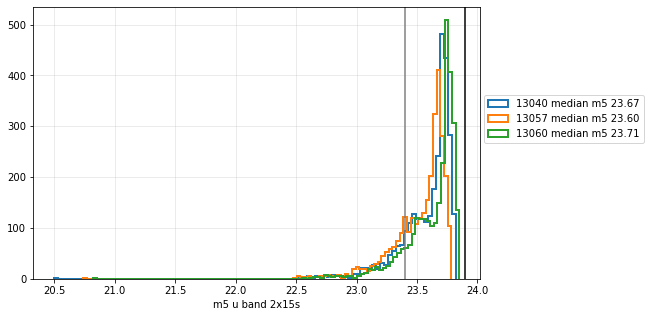

In [29]:
f = 'u'
plt.figure(figsize=(8, 5))
for series in serieses:
    n,b,p = plt.hist(m5_215[series][f], bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series} median m5 {med_215[series][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 2x15s')

Text(0.5, 0, 'm5 u band 1x30s')

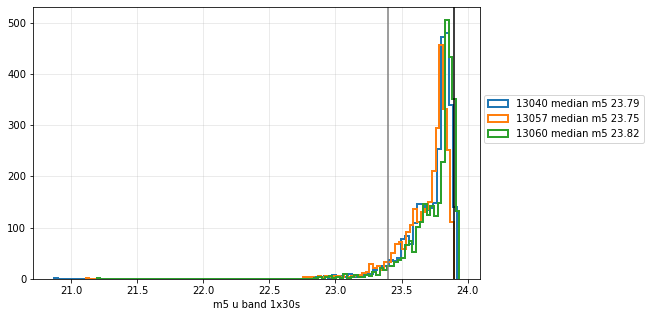

In [32]:
f = 'u'
plt.figure(figsize=(8, 5))
for series in serieses:
    n,b,p = plt.hist(m5_130[series][f], bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series} median m5 {med_130[series][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 1x30s')

Text(0.5, 0, 'm5 g band 2x15s')

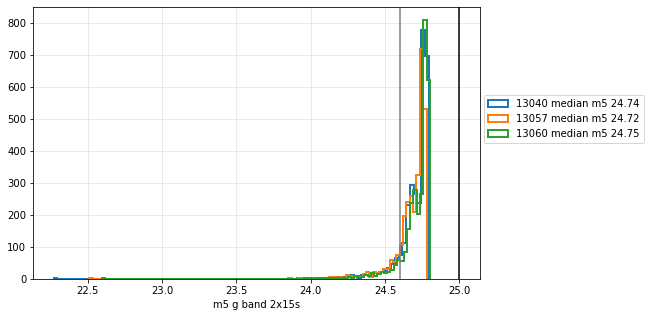

In [33]:
f = 'g'
plt.figure(figsize=(8, 5))
for series in serieses:
    n,b,p = plt.hist(m5_215[series][f], bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series} median m5 {med_215[series][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 2x15s')

Text(0.5, 0, 'm5 g band 1x30s')

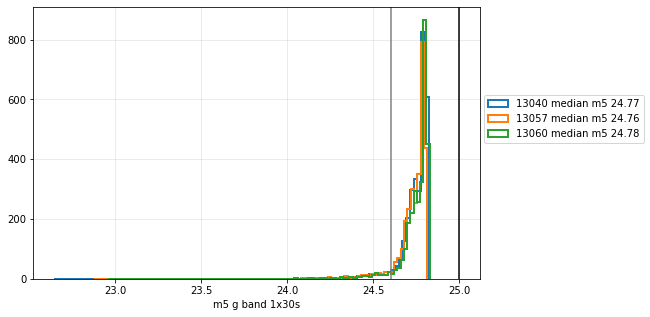

In [35]:
f = 'g'
plt.figure(figsize=(8, 5))
for series in serieses:
    n,b,p = plt.hist(m5_130[series][f], bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series} median m5 {med_130[series][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 1x30s')

Text(0.5, 0, 'm5 r band 2x15s')

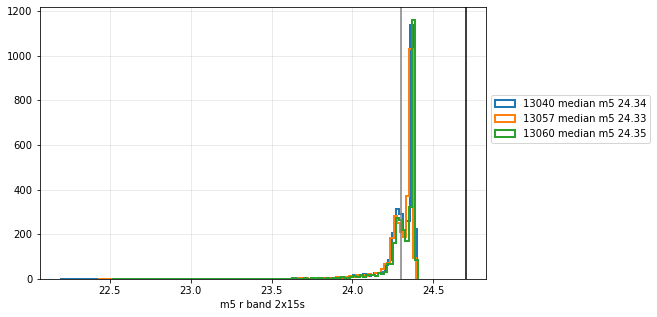

In [36]:
f = 'r'
plt.figure(figsize=(8, 5))
for series in serieses:
    n,b,p = plt.hist(m5_215[series][f], bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series} median m5 {med_215[series][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 2x15s')

Text(0.5, 0, 'm5 r band 1x30s')

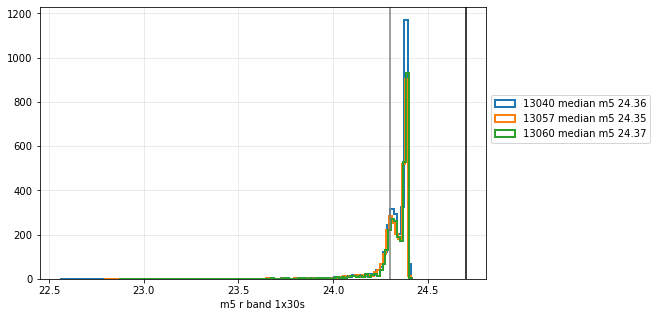

In [37]:
f = 'r'
plt.figure(figsize=(8, 5))
for series in serieses:
    n,b,p = plt.hist(m5_130[series][f], bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series} median m5 {med_130[series][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 1x30s')

Text(0.5, 0, 'm5 i band 2x15s')

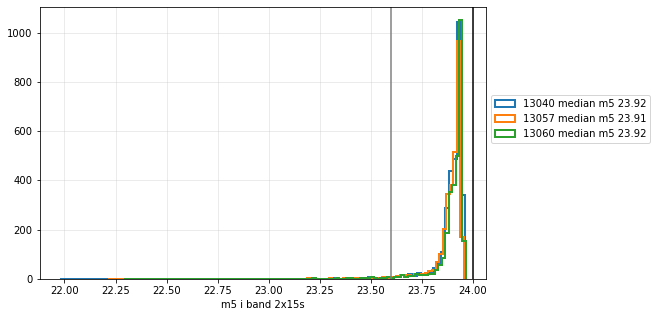

In [38]:
f = 'i'
plt.figure(figsize=(8, 5))
for series in serieses:
    n,b,p = plt.hist(m5_215[series][f], bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series} median m5 {med_215[series][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 2x15s')

Text(0.5, 0, 'm5 i band 1x30s')

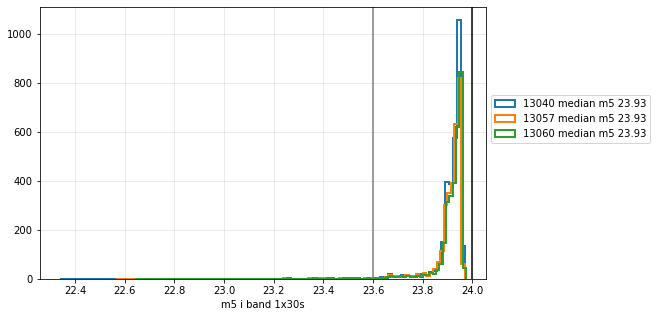

In [39]:
f = 'i'
plt.figure(figsize=(8, 5))
for series in serieses:
    n,b,p = plt.hist(m5_130[series][f], bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series} median m5 {med_130[series][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 1x30s')

Text(0.5, 0, 'm5 z band 2x15s')

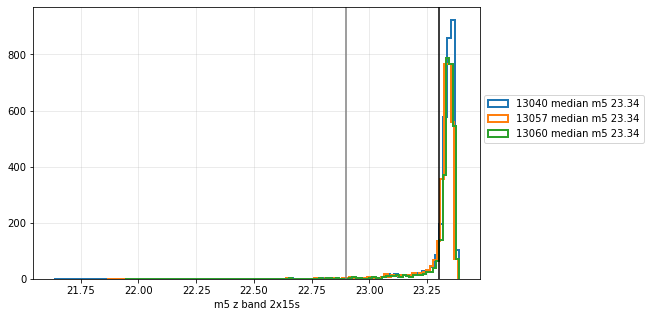

In [40]:
f = 'z'
plt.figure(figsize=(8, 5))
for series in serieses:
    n,b,p = plt.hist(m5_215[series][f], bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series} median m5 {med_215[series][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 2x15s')

Text(0.5, 0, 'm5 z band 1x30s')

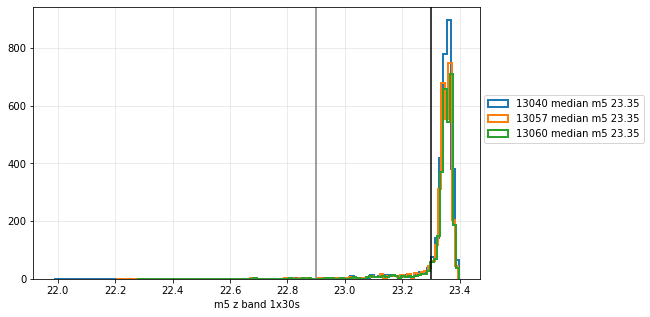

In [41]:
f = 'z'
plt.figure(figsize=(8, 5))
for series in serieses:
    n,b,p = plt.hist(m5_130[series][f], bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series} median m5 {med_130[series][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 1x30s')

Text(0.5, 0, 'm5 y band 2x15s')

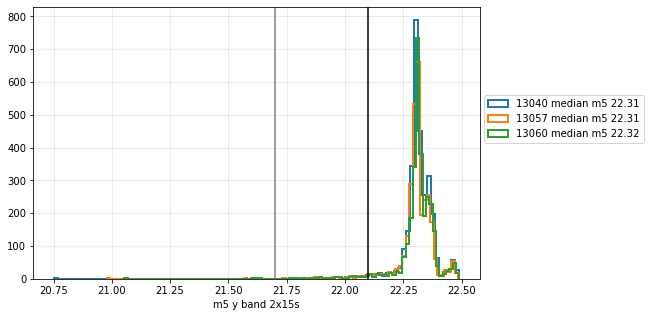

In [42]:
f = 'y'
plt.figure(figsize=(8, 5))
for series in serieses:
    n,b,p = plt.hist(m5_215[series][f], bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series} median m5 {med_215[series][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 2x15s')

Text(0.5, 0, 'm5 y band 1x30s')

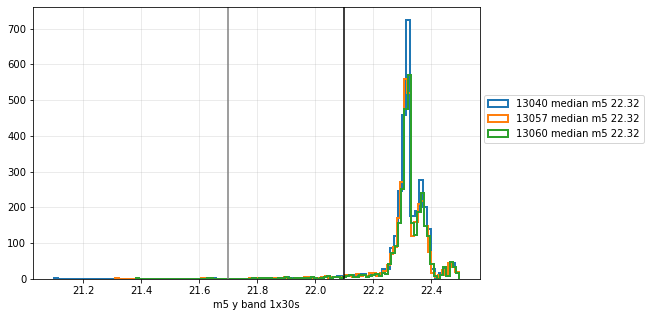

In [43]:
f = 'y'
plt.figure(figsize=(8, 5))
for series in serieses:
    n,b,p = plt.hist(m5_130[series][f], bins=100, histtype='step', 
                     alpha=1, linewidth=2, label=f'{series} median m5 {med_130[series][f]:.2f}')
    
plt.legend(loc=(1.01, 0.5), fancybox=True)
plt.grid(True, alpha=0.3)
plt.axvline(m5_fid[f], color='k')
plt.axvline(m5_min[f], color='gray')
plt.xlabel(f'm5 {f} band 1x30s')

In [45]:
pd.DataFrame(med_215)

,13040,13057,13060
u,23.667763,23.604314,23.711111
g,24.739844,24.717985,24.752811
r,24.343305,24.331029,24.351235
i,23.916932,23.909537,23.921882
z,23.340589,23.335690,23.343997
y,22.313510,22.309486,22.316136


In [46]:
pd.DataFrame(med_130)

,13040,13057,13060
u,23.791655,23.749338,23.818494
g,24.773710,24.761491,24.780846
r,24.361634,24.354419,24.365916
i,23.931896,23.927885,23.934324
z,23.351443,23.348783,23.353301
y,22.320991,22.318807,22.322363
